In [170]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

First steps and decisions made in order to work with a clean and easily understable dataset:

1 - Look the original dataset format and transform it to a more practical one:

    - Transform the dates to datetime format.

    - Interpret values with the caracter "?" as null values.

    - Look if there are any duplicated rows or inconsistent information, in this case, there is none.

    - Change the original columns name to a consistent format, concatenate the old with the new data.

    - Create new columns with additional information based on the original dataset:
        - Year
        - Month
        - Dayofweek
        - Climatic
        - Criminal activities
        - Country
    
    - Drop unwanted columns:
        - Registration, cn/ln and Flight # : We don't want to identify the aircraft or the flight in particular, the main focus of this to work in the overall context to identify general anomalies or patterns.
        - Aboard Passangers, Aboard Crew, Fatalities Passangers and Ground: The scope of this project is to work on the total number of fatalities, regardless of the characteristic.
                            
    - Fill categorical missing values with "Unknown" and set the correct dtypes for the columns.

Now, with a clean and easily understable dataset, we can start with the data analysis.

In [530]:
df = pd.read_csv('src/datasets/AirplaneCrashes.csv', parse_dates=['Date'])

In [511]:
df.head(2)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,1718,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...


In [512]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   5016 non-null   datetime64[ns]
 1   Time                   3512 non-null   object        
 2   Location               5011 non-null   object        
 3   Operator               5006 non-null   object        
 4   Flight #               1331 non-null   object        
 5   Route                  4253 non-null   object        
 6   AC Type                5003 non-null   object        
 7   Registration           4744 non-null   object        
 8   cn/ln                  4349 non-null   object        
 9   Aboard                 4999 non-null   float64       
 10  Aboard Passangers      4795 non-null   float64       
 11  Aboard Crew            4797 non-null   float64       
 12  Fatalities             5008 non-null   float64       
 13  Fat

In [516]:
pd.unique(df['Time']).tolist()

['1718',
 nan,
 '0630',
 '1830',
 '1030',
 '0100',
 '1520',
 '2345',
 '0515',
 '0845',
 '0700',
 '0745',
 '2130',
 '1000',
 '1655',
 '1215',
 '1740',
 '1140',
 '1315',
 '1645',
 '1342',
 '1730',
 'c 18:00',
 'c 02:30',
 'c 12:00',
 '0530',
 '0930',
 '1527',
 'c 13:15',
 '0800',
 '0830',
 '0405',
 '10:00',
 '14:48',
 'c 11:00',
 'c 9:15',
 '11:30',
 'c 10:00',
 '08:00',
 '10:45',
 '1700',
 '09:18',
 '1145',
 '1130',
 '2100',
 '1101',
 '1800',
 '1010',
 '0935',
 'c 17:00',
 '18:23',
 '17:30',
 'c:17:00',
 '15:00',
 'c 15:45',
 '02:05',
 '09:45',
 'c: 2:00',
 '2240',
 '1300',
 '1045',
 '2330',
 '2230',
 '0900',
 '0840',
 '2000',
 '0400',
 '0648',
 '0545',
 'c 16:00',
 '02:00',
 '1930',
 '1200',
 'c 08:00',
 '0010',
 'c:09:00',
 '0600',
 '02:07',
 '2007',
 '14:30',
 '1230',
 '0740',
 '1500',
 '0315',
 '1540',
 '1120',
 '2235',
 '1600',
 'c 13:00',
 '1815',
 '1415',
 '0500',
 '1100',
 '0950',
 '2245',
 '1050',
 '2342',
 '0730',
 '0333',
 '0252',
 '1900',
 '0045',
 '1518',
 '0330',
 '1835',


In [531]:
df['Time'] = pd.to_datetime(df['Time'].str.replace(':', '').str.replace('c ', ''), format='%H%M', errors='coerce').dt.hour

In [575]:
df['Climatic'] = (df['Summary'].fillna('').str.contains('storm')) | (df['Summary'].fillna('').str.contains('thunder'))

In [577]:
df['Criminal Activities'] = (df['Summary'].fillna('').str.contains('hijack')) | (df['Summary'].fillna('').str.contains('terrorism'))

In [605]:
def lastword(string):
    lis = list(str(string).split(" "))
    return lis[-1]

df['Country'] = df['Location'].apply(lastword)

In [584]:
df.drop(columns=['Registration', 'cn/ln', 'Aboard Passangers', 'Fatalities Passangers', 'Ground', 'Flight #'], inplace=True, axis=1)
df.fillna({'Time': 'Unknown', 'Location': 'Unknown', 'Operator': 'Unknown', 'Route': 'Unknown', 'AC Type': 'Unknown', 'Summary':'Unknown'}, inplace=True)
df = df.astype({'Aboard': float, 'Fatalities': float, 'Fatalities Crew': float})

In [585]:
df['Weekday'] = df['Date'].dt.day_name()
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 5016 non-null   datetime64[ns]
 1   Time                 5016 non-null   object        
 2   Location             5016 non-null   object        
 3   Operator             5016 non-null   object        
 4   Route                5016 non-null   object        
 5   AC Type              5016 non-null   object        
 6   Aboard               4999 non-null   float64       
 7   Aboard Crew          4797 non-null   float64       
 8   Fatalities           5008 non-null   float64       
 9   Fatalities Crew      4781 non-null   float64       
 10  Summary              5016 non-null   object        
 11  Climatic             5016 non-null   bool          
 12  Criminal Activities  5016 non-null   bool          
 13  Weekday              5016 non-nul

In [586]:
df[(df['Fatalities'] < 1) & (df['Aboard'] > 0)].shape[0]            #Probability that in a crash of a plane carrying people no one die = 72 / 4992

72

In [587]:
df[(df['Fatalities'] > 0) & (df['Aboard'] == 0)]                    # Looking for inconsistent information

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Crew,Fatalities,Fatalities Crew,Summary,Climatic,Criminal Activities,Weekday,Year,Month


Data Analysis

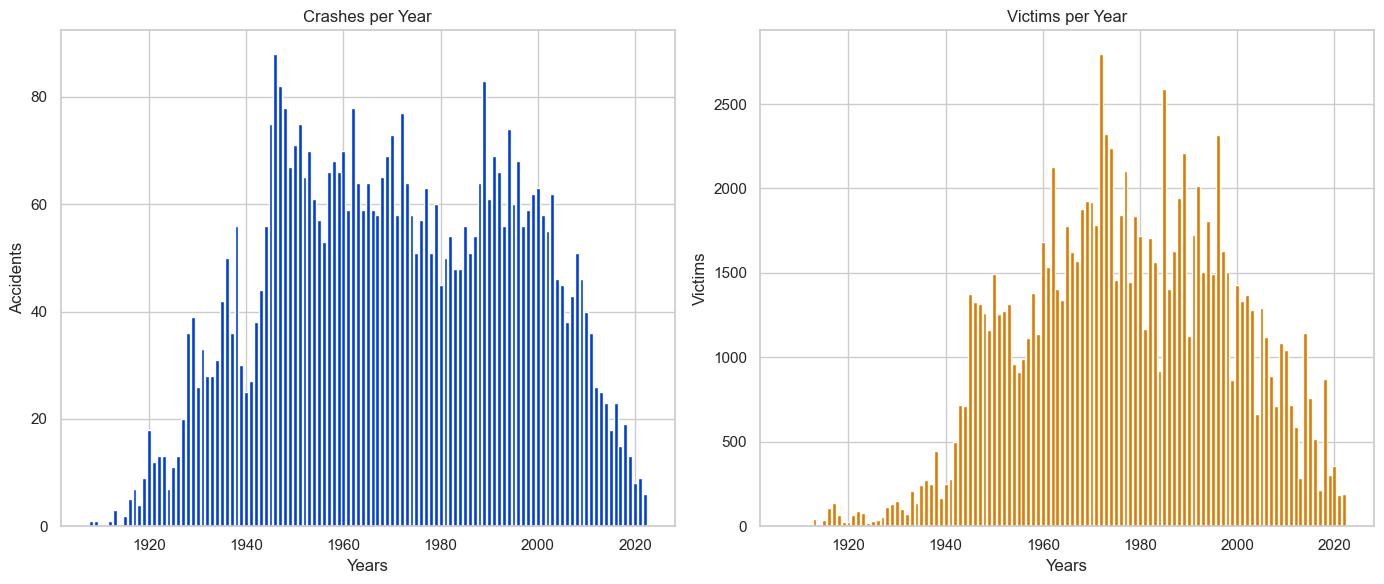

In [311]:
aux_df = df['Year'].value_counts()
aux_df2 = df.groupby('Year')['Fatalities'].sum()

category, values = aux_df.index, aux_df.values
category_victims, values_victims = aux_df2.index, aux_df2.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.bar(category, values, width=0.8, color='#003DDE')

ax1.set_xlabel('Years')
ax1.set_ylabel('Accidents')
ax1.set_title('Crashes per Year')

ax2.bar(category_victims, values_victims, width=0.8, color='#DE7A00')

ax2.set_xlabel('Years')
ax2.set_ylabel('Victims')
ax2.set_title('Victims per Year')

plt.tight_layout()

In [604]:
print(f'Year with the highest number of crashes: {df["Year"].value_counts().idxmax()}, crashes: {df["Year"].value_counts().max()}',
      f'Year with the highest number of fatalities: {df.groupby("Year")["Fatalities"].sum().idxmax()}, fatalities: {int(df.groupby("Year")["Fatalities"].sum().max())}', sep='\n')

Year with the highest number of crashes: 1946, crashes: 88
Year with the highest number of fatalities: 1972, fatalities: 2796


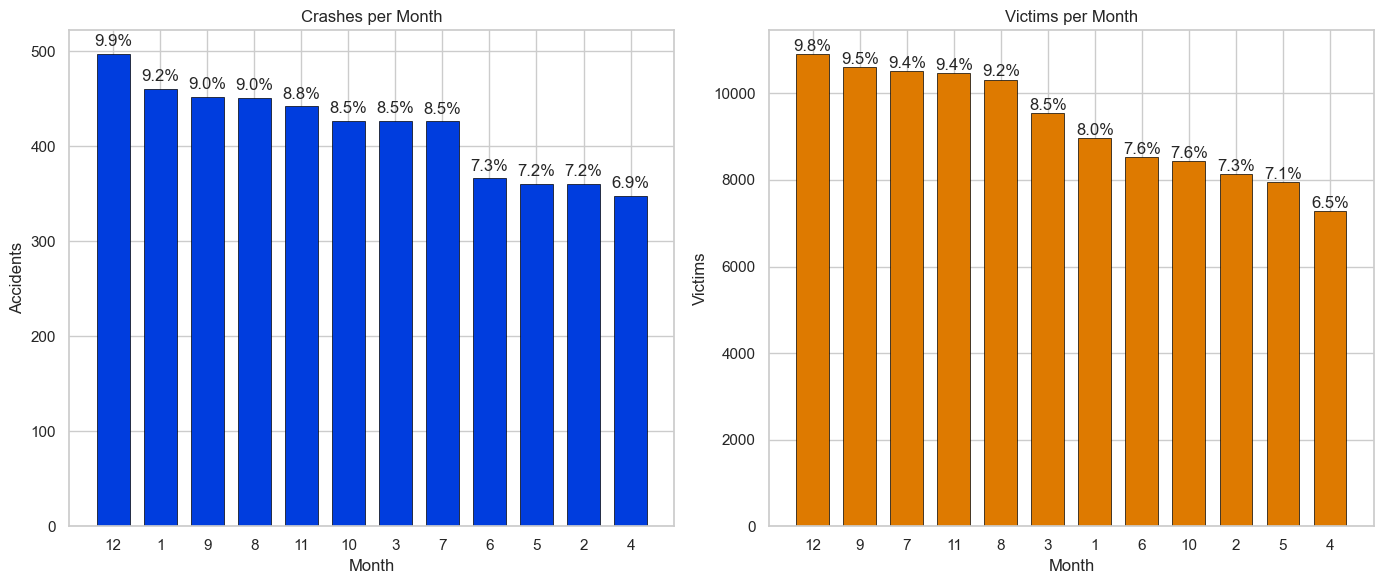

In [607]:
aux_df = df['Month'].value_counts().sort_values(ascending=False)
category_accidents, values_accidents = aux_df.index.astype(str), aux_df.values

aux_df = df.groupby('Month')['Fatalities'].sum().sort_values(ascending=False)
category_victims, values_victims = aux_df.index.astype(str), aux_df.values

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.bar(category_accidents, values_accidents, width=0.7, edgecolor='black', linewidth=0.5, color='#003DDE')

for i, v in enumerate(values_accidents):
    percentage = (v / sum(values_accidents)) * 100
    ax1.text(i, v + 5, f'{percentage:.1f}%', ha='center', va='bottom')

ax1.set_xlabel('Month')
ax1.set_ylabel('Accidents')
ax1.set_title('Crashes per Month')

ax2.bar(category_victims, values_victims, width=0.7, edgecolor='black', linewidth=0.5, color='#DE7A00')

for i, v in enumerate(values_victims):
    percentage = (v / sum(values_victims)) * 100
    ax2.text(i, v + 5, f'{percentage:.1f}%', va='bottom', ha='center')

ax2.set_xlabel('Month')
ax2.set_ylabel('Victims')
ax2.set_title('Victims per Month')

plt.tight_layout()
plt.show()

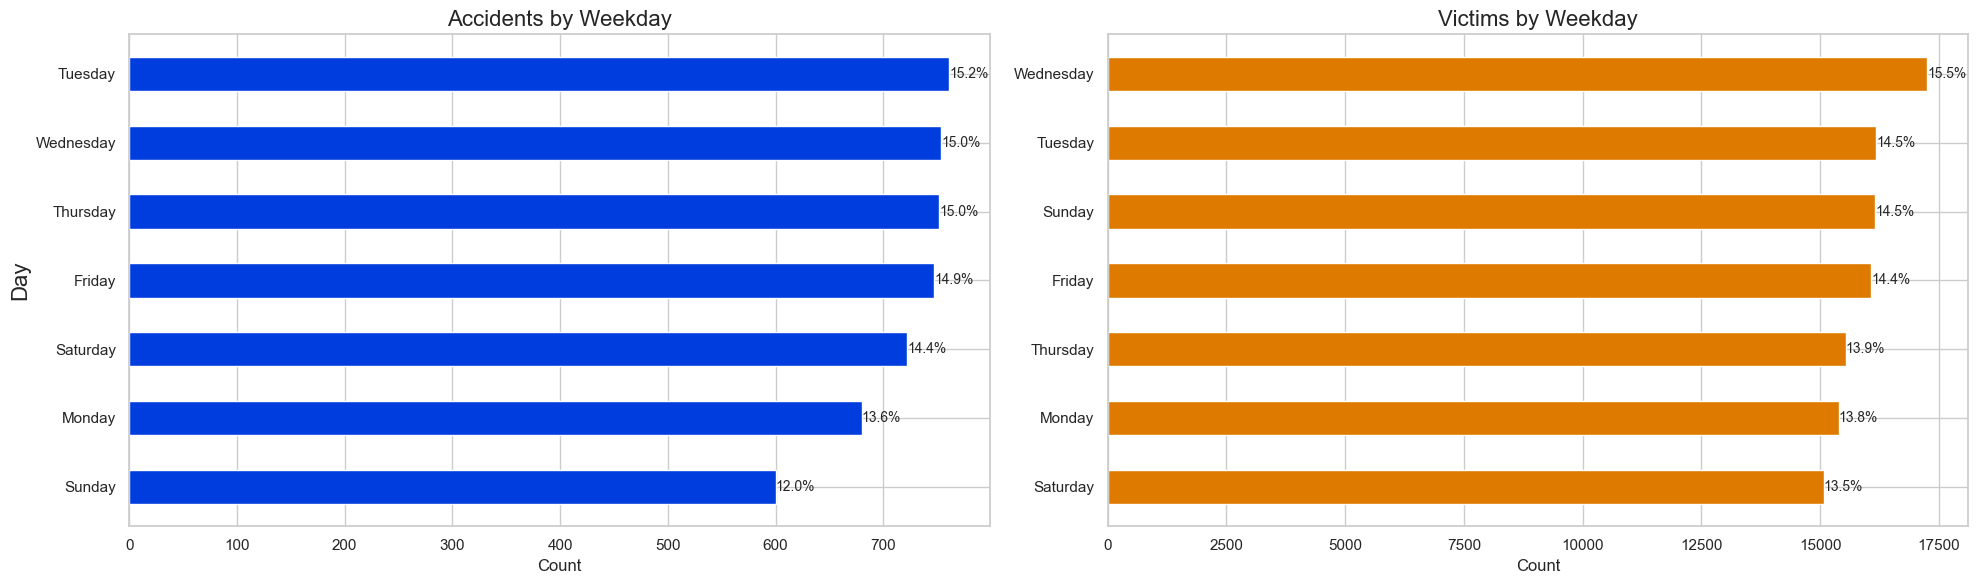

In [358]:
aux_df = df['Weekday'].value_counts().sort_values(ascending=True)
category_accidents, values_accidents = aux_df.index, aux_df.values

aux_df = df.groupby('Weekday')['Fatalities'].sum().sort_values(ascending=True)
category_victims, values_victims = aux_df.index, aux_df.values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

ax1.barh(category_accidents, values_accidents, height=0.5, color='#003DDE')

for i, v in enumerate(values_accidents):
    percentage = (v / sum(values_accidents)) * 100
    ax1.text(v, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax1.set_xlabel('Count')
ax1.set_ylabel('Day', fontsize=16)
ax1.set_title('Accidents by Weekday', fontsize=16)

ax2.barh(category_victims, values_victims, height=0.5, color='#DE7A00')

for i, v in enumerate(values_victims):
    percentage = (v / sum(values_victims)) * 100
    ax2.text(v, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax2.set_xlabel('Count')
ax2.set_title('Victims by Weekday', fontsize=16)

plt.tight_layout()
plt.show()

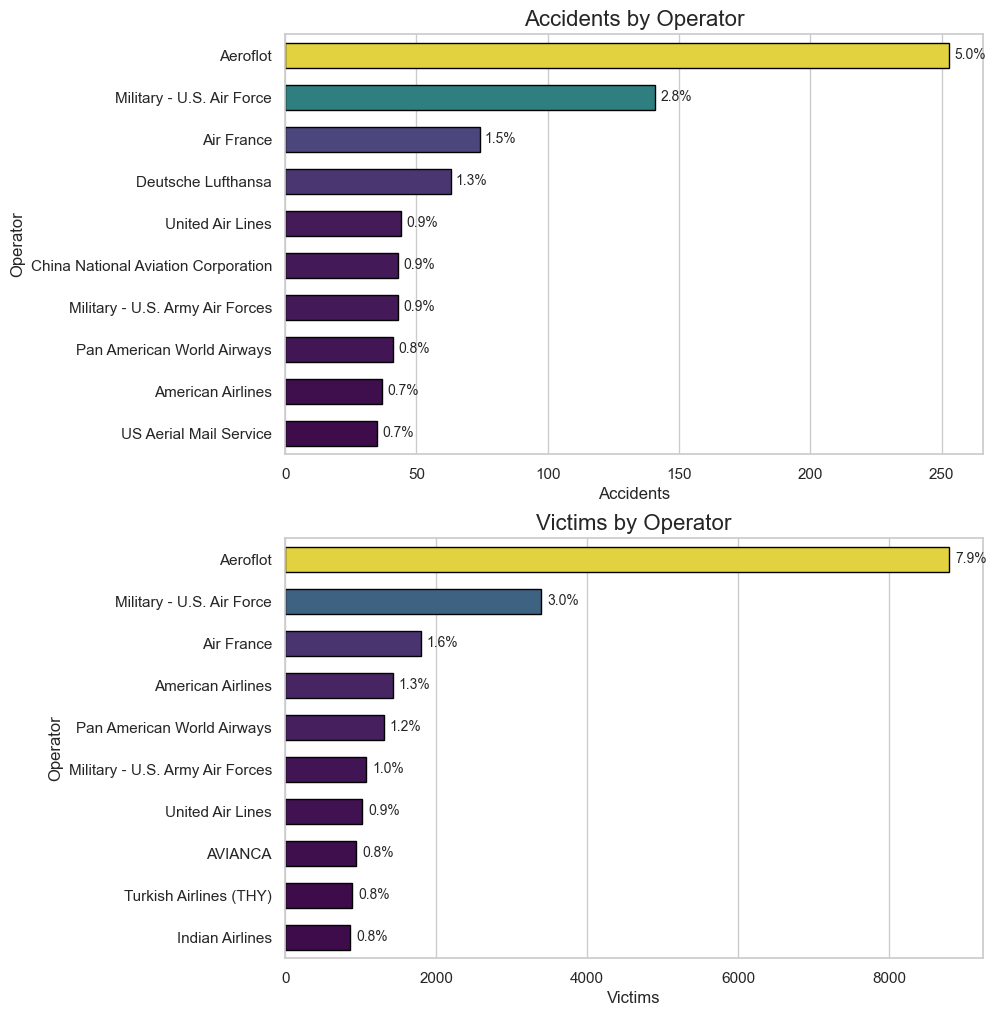

In [401]:
aux_df = df['Operator'].value_counts()
category_accidents, values_accidents = aux_df.index[:10], aux_df.values[:10]

aux_df = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False)
category_victims, values_victims = aux_df.index, aux_df.values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,12))

sns.barplot(x=values_accidents, y=category_accidents, ax=ax1, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_accidents, legend=False)

for i, v in enumerate(values_accidents):
    percentage = (v / len(df)) * 100
    ax1.text(v + 2, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax1.set_xlabel('Accidents')
ax1.set_ylabel('Operator')
ax1.set_title('Accidents by Operator', fontsize=16)

sns.barplot(x=values_victims[:10], y=category_victims[:10], ax=ax2, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_victims[:10], legend=False)

for i, v in enumerate(values_victims[:10]):
    percentage = (v / sum(values_victims)) * 100
    ax2.text(v + 80, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax2.set_xlabel('Victims')
ax2.set_ylabel('Operator')
ax2.set_title('Victims by Operator', fontsize=16)

plt.show()

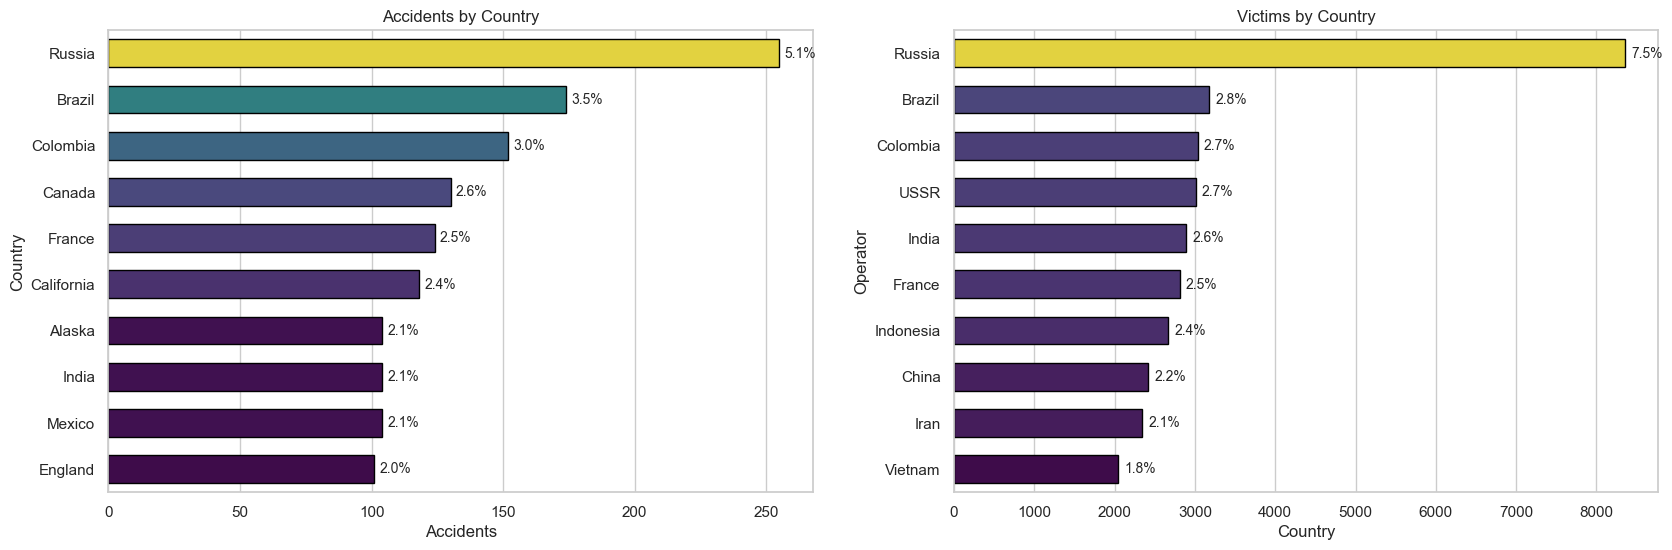

In [395]:
aux_df = df['Country'].value_counts()
category_accidents, values_accidents = aux_df.index[:10], aux_df.values[:10]

aux_df = df.groupby('Country')['Fatalities'].sum().sort_values(ascending=False)
category_victims, values_victims = aux_df.index, aux_df.values

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

sns.barplot(x=values_accidents, y=category_accidents, ax=ax1, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_accidents, legend=False)

for i, v in enumerate(values_accidents):
    percentage = (v / len(df)) * 100
    ax1.text(v + 2, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax1.set_xlabel('Accidents')
ax1.set_ylabel('Country')
ax1.set_title('Accidents by Country')

sns.barplot(x=values_victims[:10], y=category_victims[:10], ax=ax2, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_victims[:10], legend=False)

for i, v in enumerate(values_victims[:10]):
    percentage = (v / sum(values_victims)) * 100
    ax2.text(v + 80, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax2.set_xlabel('Country')
ax2.set_ylabel('Operator')
ax2.set_title('Victims by Country')

plt.show()

In [403]:
df['Route'].value_counts() / len(df)

Route
Unknown                                                    0.152113
Training                                                   0.019139
Sightseeing                                                0.006180
Test flight                                                0.004585
Sao Paulo - Rio de Janeiro                                 0.001396
                                                             ...   
Fort Lamy, Chad - Marseilles, France                       0.000199
McChord - Lawton                                           0.000199
Traing                                                     0.000199
Rome  - Lisbon -  Madrid - Santa Maria, Azores -Caracas    0.000199
Medellín - Pizarro                                         0.000199
Name: count, Length: 3845, dtype: float64

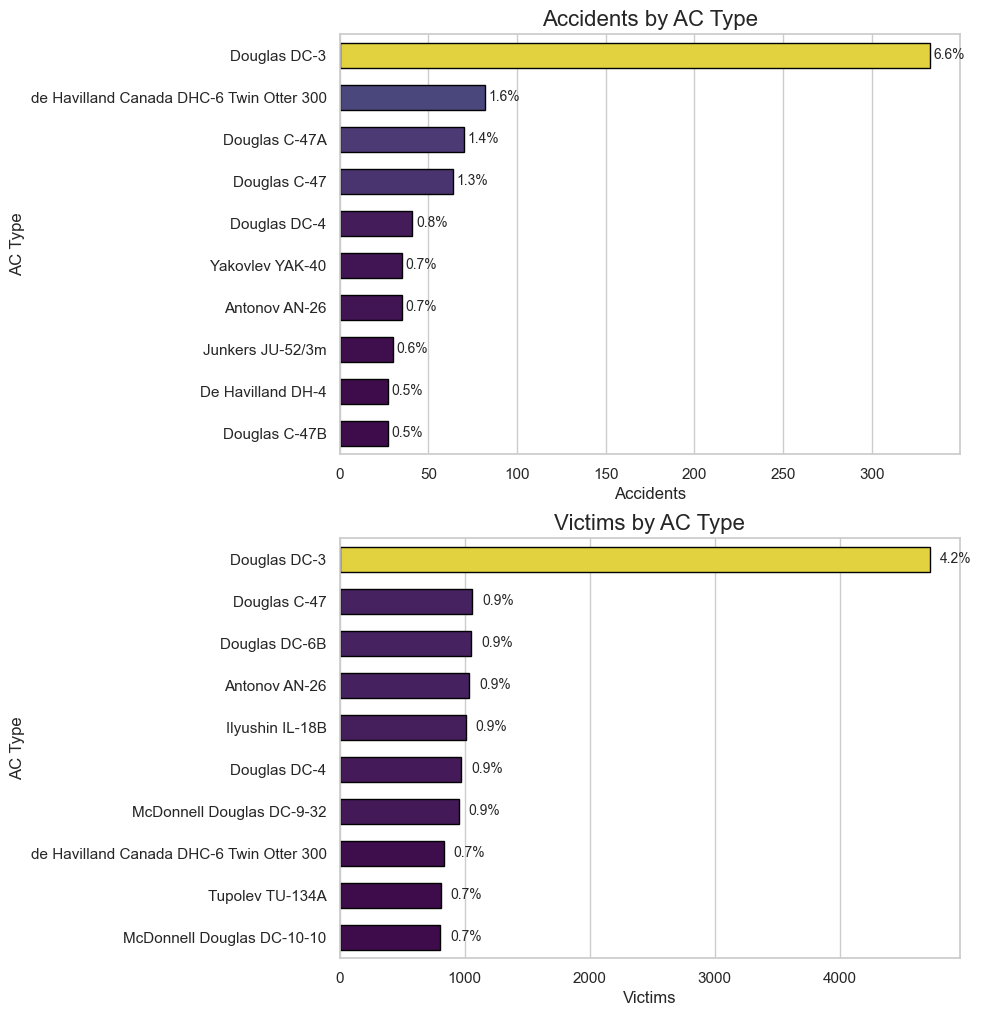

In [408]:
aux_df = df['AC Type'].value_counts()
category_accidents, values_accidents = aux_df.index[:10], aux_df.values[:10]

aux_df = df.groupby('AC Type')['Fatalities'].sum().sort_values(ascending=False)
category_victims, values_victims = aux_df.index, aux_df.values

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,12))

sns.barplot(x=values_accidents, y=category_accidents, ax=ax1, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_accidents, legend=False)

for i, v in enumerate(values_accidents):
    percentage = (v / len(df)) * 100
    ax1.text(v + 2, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax1.set_xlabel('Accidents')
ax1.set_ylabel('AC Type')
ax1.set_title('Accidents by AC Type', fontsize=16)

sns.barplot(x=values_victims[:10], y=category_victims[:10], ax=ax2, width=0.6, edgecolor='black', linewidth=1, palette='viridis', hue=values_victims[:10], legend=False)

for i, v in enumerate(values_victims[:10]):
    percentage = (v / sum(values_victims)) * 100
    ax2.text(v + 80, i, f'{percentage:.1f}%', va='center', fontsize=10)

ax2.set_xlabel('Victims')
ax2.set_ylabel('AC Type')
ax2.set_title('Victims by AC Type', fontsize=16)

plt.show()

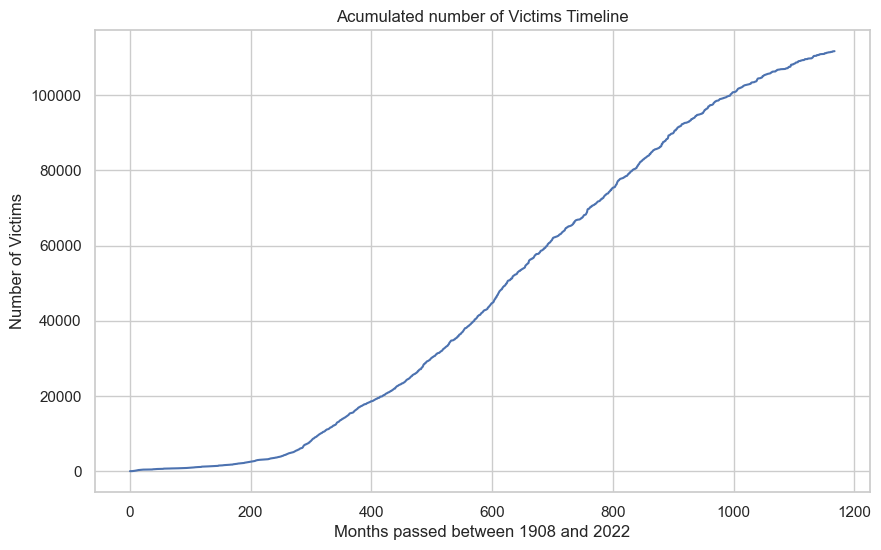

In [451]:
aux_df = df.groupby(['Year','Month'])['Fatalities'].sum().reset_index().cumsum()

fig , ax = plt.subplots(figsize=(10, 6))

ax.plot(aux_df.index, aux_df['Fatalities'], linestyle='-')

plt.xlabel('Months passed between 1908 and 2022')
plt.ylabel('Number of Victims')
plt.title('Acumulated number of Victims Timeline')
plt.show()

In [608]:
df.head()

,Date,Time,Location,Operator,Route,AC Type,Aboard,Aboard Crew,Fatalities,Fatalities Crew,Summary,Climatic,Criminal Activities,Weekday,Year,Month,Country
0,1908-09-17,17.0,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",False,False,Thursday,1908,9,Virginia
1,1909-09-07,Unknown,"Juvisy-sur-Orge, France",Unknown,Air show,Wright Byplane,1.0,1.0,1.0,0.0,Eugene Lefebvre was the first pilot to ever be...,False,False,Tuesday,1909,9,France
2,1912-07-12,6.0,"Atlantic City, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,5.0,5.0,First U.S. dirigible Akron exploded just offsh...,False,False,Friday,1912,7,Jersey
3,1913-08-06,Unknown,"Victoria, British Columbia, Canada",Private,Unknown,Curtiss seaplane,1.0,1.0,1.0,1.0,The first fatal airplane accident in Canada oc...,True,False,Wednesday,1913,8,Canada
4,1913-09-09,18.0,Over the North Sea,Military - German Navy,Unknown,Zeppelin L-1 (airship),20.0,NaN,14.0,NaN,The airship flew into a thunderstorm and encou...,True,False,Tuesday,1913,9,Sea
